<a href="https://colab.research.google.com/github/8bite-dev/colab_test/blob/main/simple_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# シンプルなディープラーニング
## データの読み込み

In [32]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])
print(iris.target[:10])
print(iris.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
(150, 4)


In [35]:
from sklearn import preprocessing
from keras import utils

scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)
x = scaler.transform(iris.data)
print(x[:10])

t = utils.to_categorical(iris.target)
print(t[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

print(x_train.shape)
print(x_test.shape)

(112, 4)
(38, 4)


# モデルの構築

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 activation_4 (Activation)   (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
 activation_5 (Activation)   (None, 3)                 0         
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5

In [42]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 1s 3ms/step - loss: 1.1880 - accuracy: 0.2500 
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 1.1182 - accuracy: 0.2857
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 1.0677 - accuracy: 0.3304
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 1.0239 - accuracy: 0.4732
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9807 - accuracy: 0.6429
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9381 - accuracy: 0.6786
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8942 - accuracy: 0.6786
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8493 - accuracy: 0.6875
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8049 - accuracy: 0.7589
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7616 - accuracy: 0.7857
Epoch 11/30
14/14 

# 学習の推移

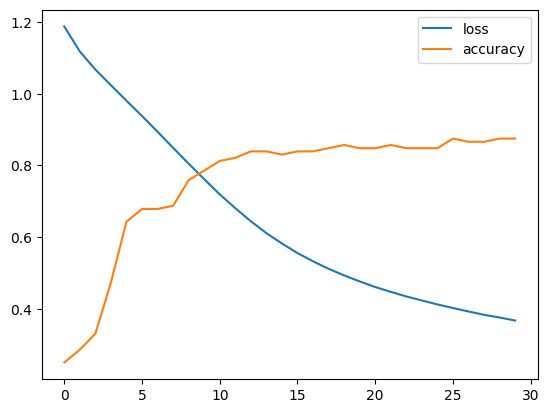

In [47]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']
hist_acc = history.history['accuracy']

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()

# 評価

In [50]:
from keras.src.metrics import accuracy
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

2/2 [==============================] - 0s 12ms/step - loss: 0.3710 - accuracy: 0.7895
0.3710181415081024 0.7894737124443054


# 予測

In [51]:
model.predict(x_test)

2/2 [==============================] - 0s 9ms/step


array([[0.9383443 , 0.05174929, 0.00990641],
       [0.01739927, 0.54571116, 0.43688956],
       [0.06314612, 0.40805292, 0.52880096],
       [0.95188785, 0.03786363, 0.0102485 ],
       [0.0617418 , 0.3889039 , 0.54935426],
       [0.04701666, 0.53974265, 0.41324067],
       [0.01520792, 0.23551263, 0.74927956],
       [0.04325155, 0.45628294, 0.50046563],
       [0.00458832, 0.14859295, 0.84681875],
       [0.03941794, 0.2536546 , 0.7069274 ],
       [0.01005761, 0.39993718, 0.5900052 ],
       [0.94341207, 0.04301514, 0.01357281],
       [0.07216671, 0.4830076 , 0.4448256 ],
       [0.01142118, 0.20663807, 0.7819407 ],
       [0.01087778, 0.16419472, 0.82492757],
       [0.9611631 , 0.03063353, 0.00820334],
       [0.05310722, 0.8311036 , 0.11578918],
       [0.03747644, 0.8105894 , 0.15193415],
       [0.6344847 , 0.3268141 , 0.03870122],
       [0.04775802, 0.7710393 , 0.18120259],
       [0.02521378, 0.21262045, 0.76216584],
       [0.08862488, 0.44786358, 0.46351153],
       [0.

# 保存

In [52]:
from keras.models import load_model

model.save('model.h5')
load_model('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
